<h3>This notebook illustrates how these scripts can be used to convert the Illumina sequencing data to a matrix of Y scores for the individual mutants.</h3>

Import the scripts.

In [1]:
import fastq_parser, design, misc, plots, tables
import numpy as np

np.set_printoptions(suppress=True, precision=2)

print("numpy version: ", np.__version__)

import sys
print("python version: ", sys.version)

numpy version:  1.18.5
python version:  3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


Specify what the parent and library peptides should look like. 

<p style="font-size:10">Note, that for lactazole saturation mutagenesis libraries, we read only the fraction of the ORF (due to its full size exceeding 150 bp). Hence, our library peptide is missing most of the leader peptide sequence. Letters represent standard amino acid encoding, and numerals are all positions subject to saturation mutagenesis.</p>

In [2]:
library_peptide = 'LPENGA1111111111111111YPYDVPDYAGELARP'
parent_peptide = 'LPENGASWGAAAAQASSSCAQPYPYDVPDYAGELARP'

lib = design.PepDesign(library_peptide, parent_peptide)

Parse the .fastq files.

<p>The easiest way to do it is to call <i>fastq_parser.parse_cwd</i>, which will go through all .fastq files in the current working directory. </p>
<p>For each .fastq in the folder, the parser will fetch the list of DNA sequences, translate them to a list of peptides, and then filter the peptides according to the following sieves:</p>
<p></p>   
<p>i) the peptide length as specified by the library design</p>
<p>ii) ORF contains a stop codon, and sequence contains no ambigous symbol</p>
<p>iii) the sequence region subject to mutagenesis contains less than 2 mutations</p>

Finally, the parser will write down the peptide lists (as .npy files) to the same directory. For this example, two .fastq files (t_0060_neg.fastq and t_0060_pos.fastq, i.e. reads for reactive and unreactive cDNA fractions after a 60 min reaction) will be parsed. 

In [3]:
fastq_parser.parse_cwd(lib)

Parsing t_0060_neg.fastq . . .
Parsing t_0060_pos.fastq . . .


Load peptide lists for reactive and unreactive fractions

In [4]:
P_pos = np.load('t_0060_pos_as_P.npy').astype('<U1')
P_neg = np.load('t_0060_neg_as_P.npy').astype('<U1')

#check how many peptides each set holds
print("Reactive peptide set:", P_pos.shape)
print("Unreactive peptide set:", P_neg.shape)

Reactive peptide set: (1305246, 16)
Unreactive peptide set: (945482, 16)


Compute the Y scores and plot the results

In [5]:
Y = misc.compute_Y(P_pos, P_neg, lib.wt)
Y.shape

(20, 16)

In [6]:
#average log2Y scores for every position
np.mean(np.log2(Y), axis=0)

array([-1.72, -1.83, -0.29,  1.06,  1.33,  1.59,  1.63,  1.11,  0.2 ,
       -1.61, -1.52, -1.78, -1.79, -1.04,  0.89, -0.3 ])

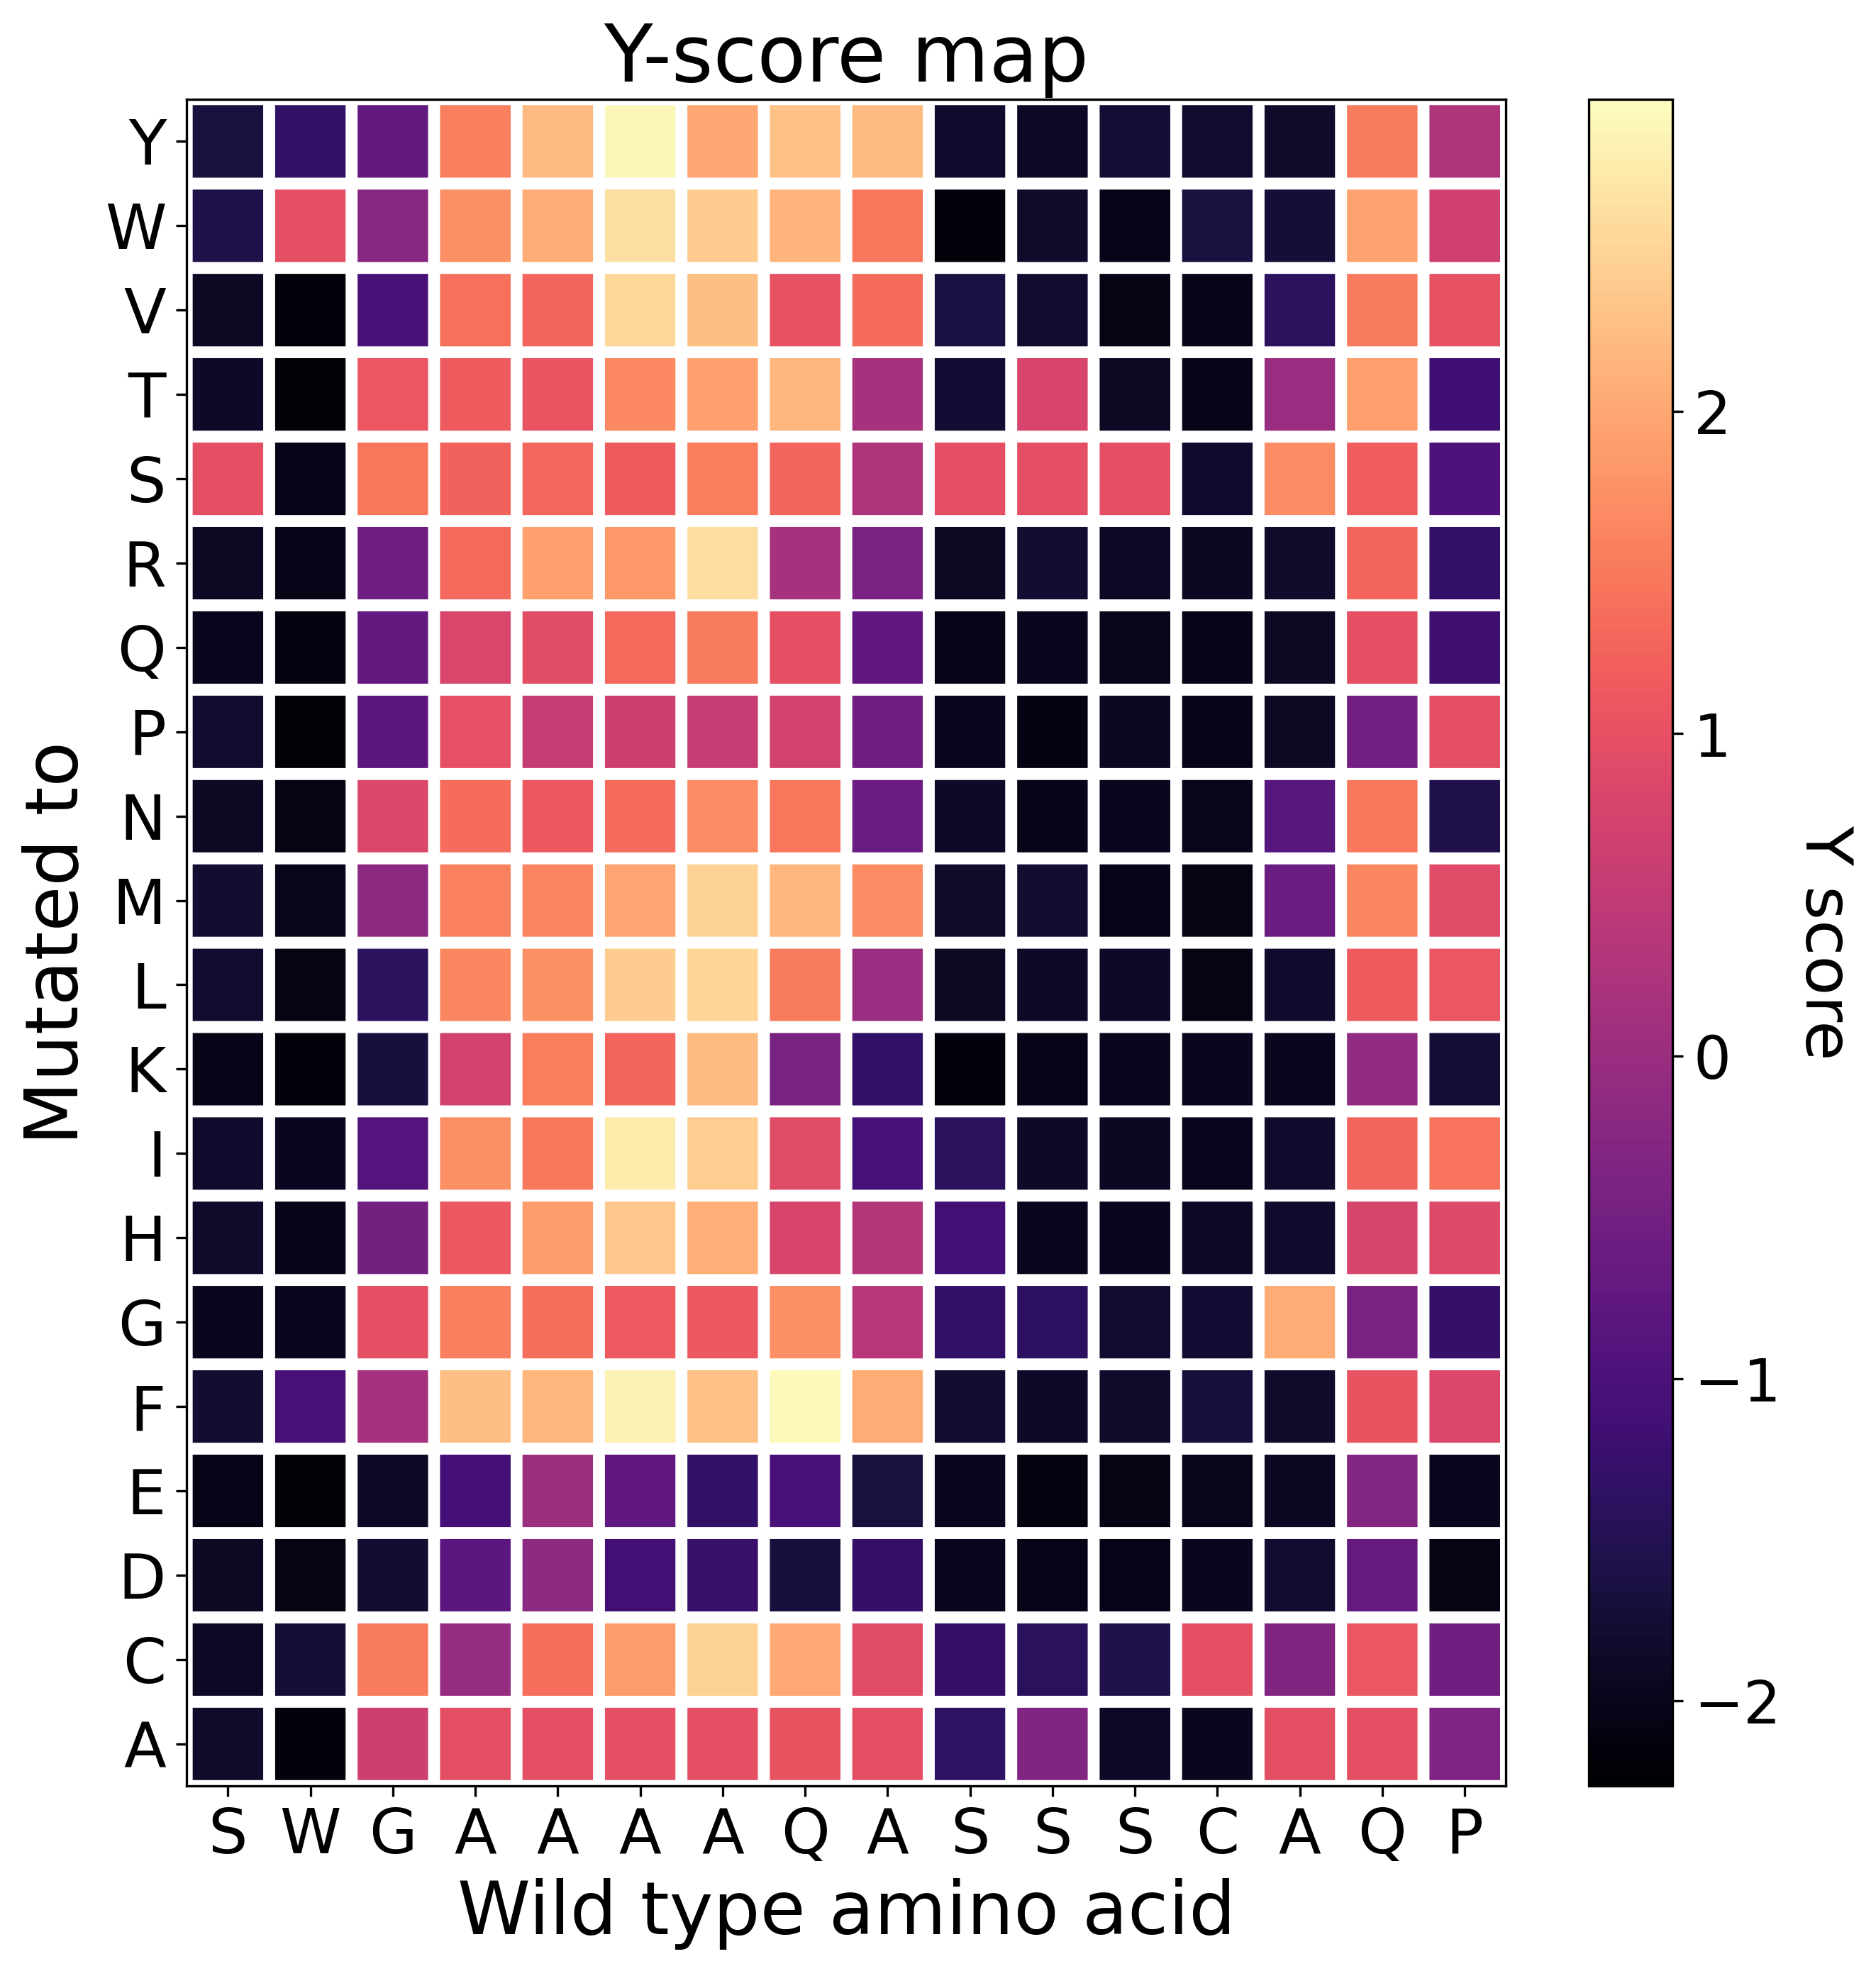

In [7]:
plots.Y_score(np.log2(Y), lib, 't=60_Y_score_matrix')

That's it!
Sampling errors can also be computed as follows:

In [8]:
err = misc.Y_sampling_error(P_pos, P_neg)
err.shape

(20, 16)

In [9]:
#print sampling error for mutants in position 1
print(err[:,0])

[0.07 0.13 0.09 0.09 0.14 0.1  0.08 0.1  0.07 0.07 0.1  0.07 0.06 0.08
 0.06 0.   0.05 0.09 0.15 0.11]
